## DAS4Orcas first Widbey Island visualization attempt

In [1]:
# pip install autoreload if not installed
# import autoreload
# %load_ext autoreload
# %autoreload 2
# Imports
import numpy as np
import scipy.signal as sp
import matplotlib.pyplot as plt
import das4whales as dw # Import the das4whales library, if not installed refer to https://das4whales.readthedocs.io/en/latest/src/install.html

In [ ]:
# filepath = 'data/decimator_2024-10-25_23.44.00_UTC_006608.h5'
# filename = 'decimator_22024-10-25_23.44.00_UTC_006608.h5'

filepath = 'data/decimator_2024-10-29_20.26.00_UTC_012170.h5'
filename = 'decimator_2024-10-29_20.26.00_UTC_012170.h5'

# filepath = 'data/decimator_2024-10-25_23.46.00_UTC_006610.h5'
# filename = 'decimator_22024-10-25_23.46.00_UTC_006610.h5'

# filepath = 'data/decimator_2024-10-25_23.47.00_UTC_006611.h5'
# filename = 'decimator_22024-10-25_23.47.00_UTC_006611.h5'

# filepath = 'data/decimator_2024-10-25_23.48.00_UTC_006612.h5'
# filename = 'decimator_22024-10-25_23.48.00_UTC_006612.h5'

# filepath = 'data/decimator_2024-10-25_23.49.00_UTC_006613.h5'
# filename = 'decimator_22024-10-25_23.49.00_UTC_006613.h5'

In [3]:
# Read HDF5 files and access metadata
# Get the acquisition parameters for the data folder
metadata = dw.data_handle.get_acquisition_parameters(filepath, interrogator='onyx')

fs, dx, nx, ns, gauge_length, scale_factor = metadata["fs"], metadata["dx"], metadata["nx"], metadata["ns"], metadata["GL"], metadata["scale_factor"]

print(f'Sampling frequency: {metadata["fs"]} Hz')
print(f'Channel spacing: {metadata["dx"]} m')
print(f'Gauge length: {metadata["GL"]} m')
print(f'File duration: {metadata["ns"] / metadata["fs"]} s')
print(f'Cable max distance: {metadata["nx"] * metadata["dx"]/1e3:.1f} km')
print(f'Number of channels: {metadata["nx"]}')
print(f'Number of time samples: {metadata["ns"]}')

1.15e-07
Sampling frequency: 2000.0 Hz
Channel spacing: 6.380952536802641 m
Gauge length: 6.380952536802641 m
File duration: 60.0 s
Cable max distance: 10.0 km
Number of channels: 1567
Number of time samples: 120000


In [4]:
selected_channels_m_north = [0, 15000, 7]  # list of values in meters corresponding to the starting,
                                                # ending and step wanted channels along the FO Cable
                                                # selected_channels_m = [ChannelStart_m, ChannelStop_m, ChannelStep_m]
                                                # in meters

                                                # ### Select the desired channels and channel interval

selected_channels = [int(selected_channels_m // dx) for selected_channels_m in
                selected_channels_m_north]  # list of values in channel number (spatial sample) corresponding to the starting, ending and step wanted
                                        # channels along the FO Cable
                                        # selected_channels = [ChannelStart, ChannelStop, ChannelStep] in channel
                                        # numbers

print('Begin channel #:', selected_channels[0], 
', End channel #: ',selected_channels[1], 
', step: ',selected_channels[2], 
'equivalent to ',selected_channels[2]*dx,' m')

Begin channel #: 0 , End channel #:  2350 , step:  1 equivalent to  6.380952536802641  m


In [5]:
tr, time, dist, fileBeginTimeUTC = dw.data_handle.load_das_data(filepath, selected_channels, metadata)
metadata["fileBeginTimeUTC"] = fileBeginTimeUTC.strftime("%Y-%m-%d_%H:%M:%S")

In [6]:
# Bandpass the data between 0.1 and 1 Hz
b, a = sp.butter(4, [400,950], 'bp', fs=fs)
# b, a = sp.butter(2, 30, 'high', fs=fs)
tr = sp.filtfilt(b, a, tr, axis=1)

In [7]:
# Useful commands to free memory (jupyter notebook does not free memory after a cell is executed)
import gc
gc.collect()

1195

In [8]:
# Adapt the scale of the data to the plot
min_tr = np.min(tr)
max_tr = np.max(tr)
scale = np.min([np.abs(min_tr), np.abs(max_tr)]) *0.0000001

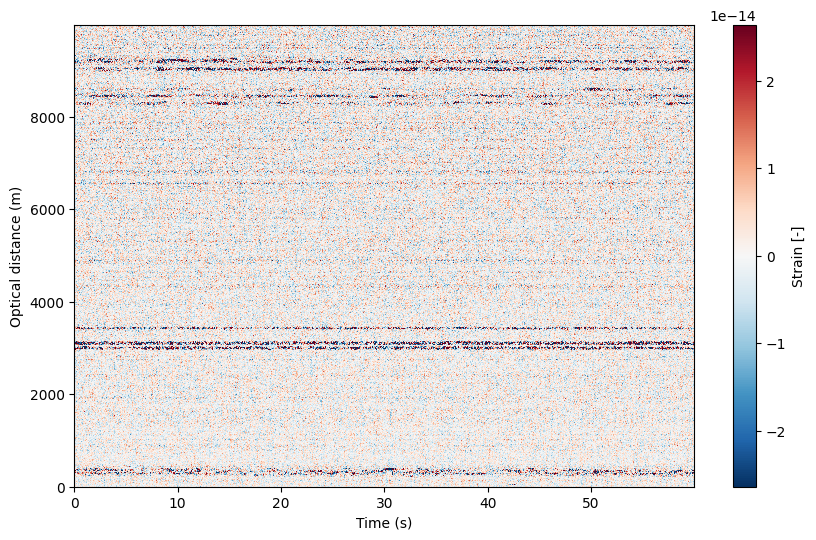

In [9]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.imshow(tr, origin='lower', aspect='auto', cmap='RdBu_r', extent=[0, time[-1], dist[0], dist[-1]], vmin=-scale, vmax=scale)
plt.ylabel('Optical distance (m)')
plt.xlabel('Time (s)')
# plt.ylim(3500,4000)
# plt.xlim(45, 52)
plt.colorbar(label='Strain [-]')
plt.show()